In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [4]:
svc = SVC(gamma='auto')

In [2]:
data = load_iris()
iris = pd.DataFrame(data['data'], columns=data.feature_names)
target = data.target

In [5]:
cv_result = cross_val_score(svc, iris, target, cv=10, scoring='accuracy')
print('Acurácia com cross validation:', cv_result.mean()*100)

Acurácia com cross validation: 98.00000000000001


In [6]:
svc.fit(iris, target)
svc.predict([[6.9,2.8,6.1,2.3]])

e:\Códigos\Python-Codigo-Faculdade\Tópicos de BigData em Python\sala_de_aula\módulo 6\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])

Text(0.5, 1.0, 'Iris')

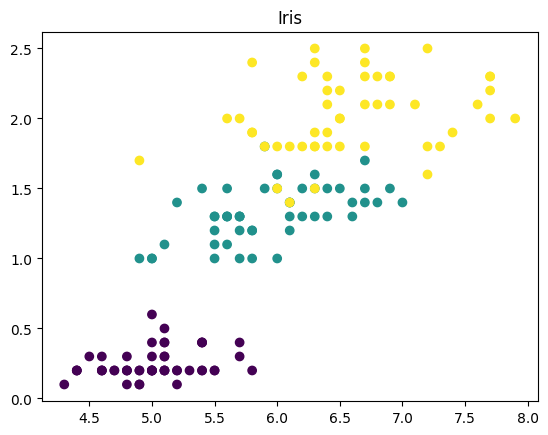

In [7]:
plt.scatter(iris['sepal length (cm)'], iris['petal width (cm)'], c=target)
plt.title('Iris')

e:\Códigos\Python-Codigo-Faculdade\Tópicos de BigData em Python\sala_de_aula\módulo 6\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


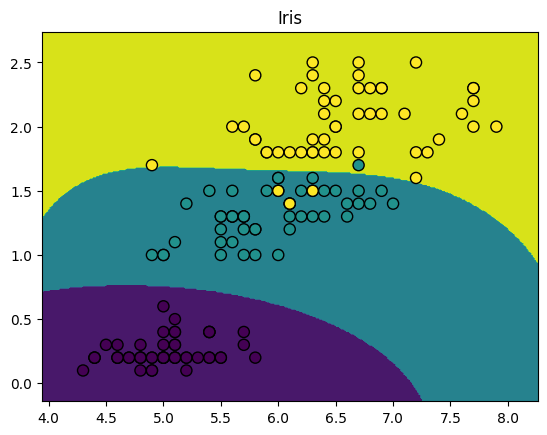

In [8]:
x0_min, x0_max = iris['sepal length (cm)'].min(), iris['sepal length (cm)'].max()
x1_min, x1_max = iris['petal width (cm)'].min(), iris['petal width (cm)'].max()
w = x0_max - x0_min
h = x1_max - x1_min
x0, x1 = np.meshgrid(np.linspace(x0_min-.1*w, x0_max+.1*w, 300),
                          np.linspace(x1_min-.1*h, x1_max+.1*h, 300))
svc.fit(iris[['sepal length (cm)', 'petal width (cm)']], target)
ypred = svc.predict(np.c_[x0.reshape(-1, 1), x1.reshape(-1, 1)])
ypred = ypred.reshape(x0.shape)
plt.contourf(x0, x1, ypred)
plt.scatter(iris['sepal length (cm)'], iris['petal width (cm)'], c=target, s=64, edgecolors='k')
plt.title('Iris')
plt.show()